<a href="https://colab.research.google.com/github/KelianF/MachineLearning/blob/master/Supervised/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Linear Regression
## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Set up data and display it

Text(0, 0.5, 'y')

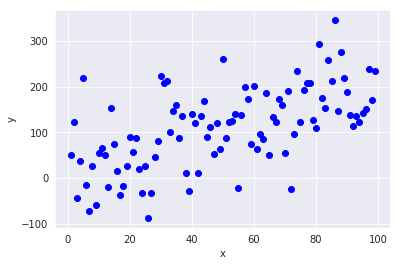

In [50]:
#Defining the x array. 
x=np.array(range(1,100)) 


#Defining the y array. 
y=10+2*x.ravel() 
y=y+np.random.normal(loc=0, scale=70, size=99)


plt.scatter(x,y, color='blue')
plt.xlabel('x') 
plt.ylabel('y')


# Using Scikit-Learn
## Imports


In [0]:
from sklearn.linear_model import LinearRegression

## Code

In [0]:
Reg = LinearRegression()
Reg.fit(x[:, np.newaxis],y[:,np.newaxis])
y_hat=Reg.predict(x[:, np.newaxis])


In [61]:
print('Intercept is: ' + str(round(Reg.intercept_[0],3)))
print('Coef is/are: ' + str(Reg.coef_))

print('R2 is: ' + str(round(Reg.score(x[:, np.newaxis],y[:, np.newaxis]),2))) 


Intercept is: 18.703
Coef is/are: [[1.8352312]]
R2 is: 0.35


## Graphical representation

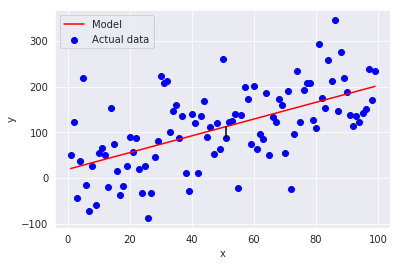

In [82]:
plt.scatter(x,y, color='blue', label ='Actual data') 
plt.plot(x,y_hat, color='red', label ='Model')
plt.plot((x[50],x[50]) ,(y[50], y_hat[50]), color='black')
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.show()

This Graphical representation, shows the data and our model. 

I have added a line representing the difference between our model and the actual data, in econometrics, this is called ε. 

Hence, a regression is a minimisation problem of the sum of all the ε squared.


Furthermore, the regression performed here is of the form Y on X, which explais why the ε is parallel to the Y axis. If the opposite was computed, the ε looked at for minimization would've been parallel to the X axis.

# Using Scipy

## imports

In [0]:
from scipy import stats

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [67]:
print('Intercept is: ' + str(round(intercept,3)))
print('Coef is/are: ' + str(slope))

print('R2 is: ' + str(round(r_value**2,2))) 



Intercept is: 18.703
Coef is/are: 1.835231197250304
R2 is: 0.35


# Using TensorFlow

## Import

In [0]:
import tensorflow as tf

## Code

In [0]:
# Defining the placeholder that we can input in the optimizer.

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

# Declaring two trainable TF variables for the weight and bias (initialized randomly), and two parameters: The learning rate and the epochs.

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

learning_rate = 0.01
training_epochs = 1000

# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x)) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [75]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 

        if (epoch + 1) % 50 == 0:  # Displaying the result after every 50 epochs 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})  # Storing necessary values to be used outside the Session 
    weight = sess.run(W) 
    bias = sess.run(b) 

# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, ",Weight =", weight, ",bias =", bias, '\n') 

Epoch 50 : cost = 2657.519 W = 2.3568723 b = 0.64022034
Epoch 100 : cost = 2657.3528 W = 2.3482263 b = 1.4960958
Epoch 150 : cost = 2657.4138 W = 2.3401942 b = 2.2911782
Epoch 200 : cost = 2657.6565 W = 2.332733 b = 3.0297873
Epoch 250 : cost = 2658.0427 W = 2.3258014 b = 3.7159371
Epoch 300 : cost = 2658.5396 W = 2.3193622 b = 4.3533607
Epoch 350 : cost = 2659.1206 W = 2.3133802 b = 4.9455113
Epoch 400 : cost = 2659.7637 W = 2.307823 b = 5.4956136
Epoch 450 : cost = 2660.4497 W = 2.3026607 b = 6.006618
Epoch 500 : cost = 2661.164 W = 2.2978652 b = 6.481338
Epoch 550 : cost = 2661.8945 W = 2.29341 b = 6.9223437
Epoch 600 : cost = 2662.6294 W = 2.2892714 b = 7.3320236
Epoch 650 : cost = 2663.362 W = 2.2854269 b = 7.7126007
Epoch 700 : cost = 2664.085 W = 2.2818553 b = 8.066138
Epoch 750 : cost = 2664.7932 W = 2.2785375 b = 8.394556
Epoch 800 : cost = 2665.483 W = 2.275455 b = 8.699714
Epoch 850 : cost = 2666.1511 W = 2.2725918 b = 8.983114
Epoch 900 : cost = 2666.7954 W = 2.269932 b = 9

In this case, the method to solve the linear regression minimization problem is to perform a gradiant descent, the reason it has not been performed that way in the previous two cases is that linear regression has a closed formula (More explanation below), which is quite rare in optimization problem.

Hence, the TensorFlow solution is more general for optimization problems.

## Graphical representation

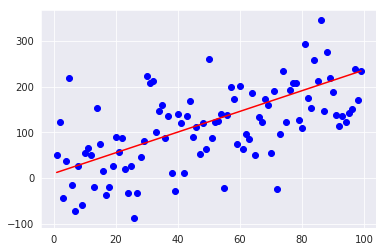

In [93]:
plt.plot(x, y, 'ro', color='blue') 
plt.plot(x, predictions, color='red')

# Linear Regression from scratch and explanation